In [14]:
import numpy as np
import pandas as pd

# Параметри
p = 8
n = 20
x0 = p
xn = p + 10
h = (xn - x0) / n

# Функція
def f(x, p=1):
    return (1 / p) * np.sin(np.log(x + p))

# Табуляція
x_values = np.linspace(x0, xn, n + 1)
y_values = f(x_values, p)

# Зберігаю у файл
data = pd.DataFrame({'x': x_values, 'y': y_values})
data.to_csv("function_data.txt", sep='\t', index=False)

# Вивід
x_values, y_values


(array([ 8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5, 13. ,
        13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5, 18. ]),
 array([ 0.04508582,  0.0414775 ,  0.03793935,  0.03447138,  0.03107334,
         0.02774473,  0.02448487,  0.02129293,  0.01816797,  0.01510894,
         0.01211473,  0.00918418,  0.00631608,  0.00350921,  0.0007623 ,
        -0.00192589, -0.00455664, -0.00713118, -0.00965078, -0.01211667,
        -0.01453006]))

In [15]:
# Функція для обчислення розділених різниць
def divided_differences(x, y):
    n = len(x)
    coef = np.copy(y)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j - 1:n - 1]) / (x[j:n] - x[0:n - j])
    return coef

# Функція Ньютона
def newton_polynomial(x_data, coef, x):
    n = len(coef)
    result = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (x - x_data[j])
        result += term
    return result

# Зчитування з файлу
nodes = pd.read_csv("nodes.txt", sep='\t')
x_nodes = nodes['x'].values
y_nodes = nodes['f(x)'].values

# Коефіцієнти розділених різниць
coef = divided_differences(x_nodes, y_nodes)

# Перевірка для довільного x
x_test = p + 5
f_exact = f(x_test)
f_interp = newton_polynomial(x_nodes, coef, x_test)
error = f_exact - f_interp

print(f"f({x_test}) = {f_exact}")
print(f"N({x_test}) = {f_interp}")
print(f"Похибка ε({x_test}) = {error}")


f(13) = 0.48164895148824644
N(13) = 0.012114730616803
Похибка ε(13) = 0.4695342208714434


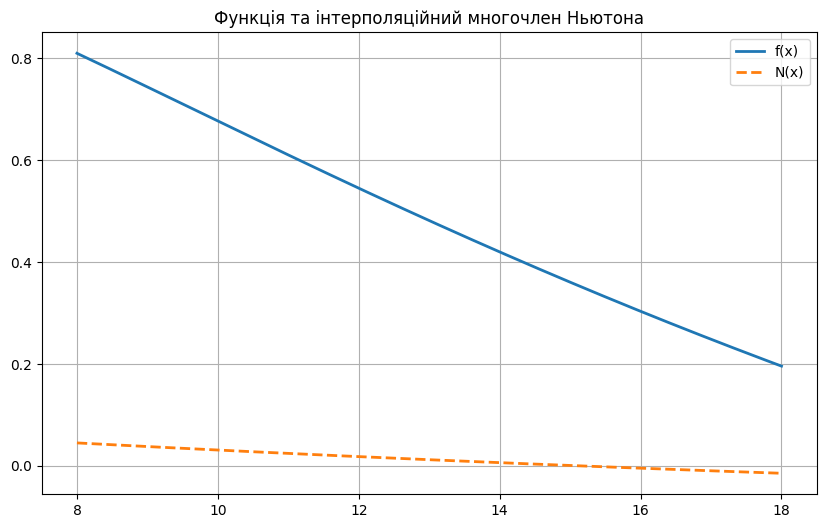

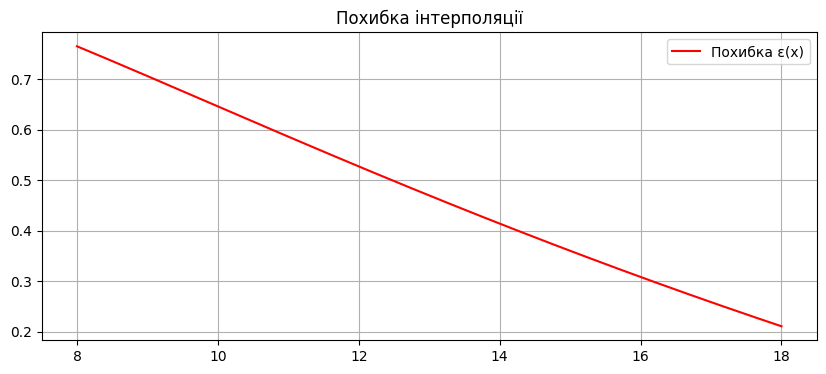

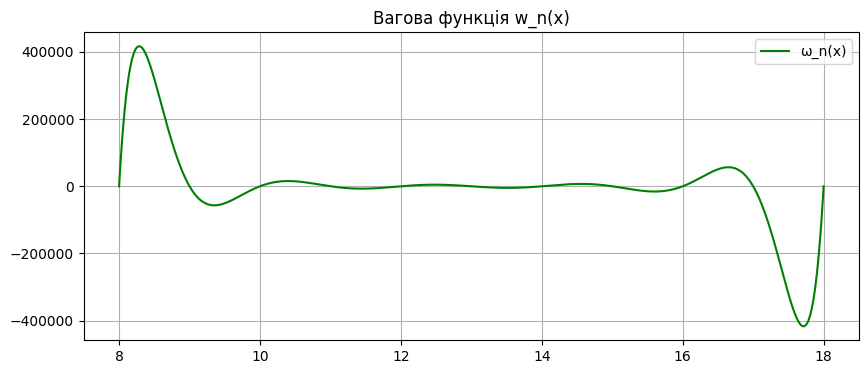

In [16]:
import matplotlib.pyplot as plt

# Вагова функція
def omega(x, nodes):
    w = 1
    for xi in nodes:
        w *= (x - xi)
    return w

# Сітка
grid_x = np.linspace(x0, xn, 1000)
grid_f = f(grid_x)
grid_N = [newton_polynomial(x_nodes, coef, x) for x in grid_x]
grid_err = np.abs(grid_f - grid_N)
grid_omega = [omega(x, x_nodes) for x in grid_x]

# Графіки
plt.figure(figsize=(10, 6))
plt.plot(grid_x, grid_f, label='f(x)', linewidth=2)
plt.plot(grid_x, grid_N, '--', label='N(x)', linewidth=2)
plt.title('Функція та інтерполяційний многочлен Ньютона')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(grid_x, grid_err, 'r', label='Похибка ε(x)')
plt.title('Похибка інтерполяції')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(grid_x, grid_omega, 'g', label='ω_n(x)')
plt.title('Вагова функція w_n(x)')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
ns = [5, 10, 20]
x_fixed = p + 5

for n in ns:
    x_vals = np.linspace(p, p + 10, n + 1)
    y_vals = f(x_vals)
    coef = divided_differences(x_vals, y_vals)
    N_val = newton_polynomial(x_vals, coef, x_fixed)
    real_val = f(x_fixed)
    err = np.abs(real_val - N_val)
    print(f"n = {n:2d}, h = {(x_vals[1] - x_vals[0]):.4f}, f(x) = {real_val:.6f}, N(x) = {N_val:.6f}, похибка = {err:.2e}")


n =  5, h = 2.0000, f(x) = 0.481649, N(x) = 0.481641, похибка = 8.36e-06
n = 10, h = 1.0000, f(x) = 0.481649, N(x) = 0.481649, похибка = 0.00e+00
n = 20, h = 0.5000, f(x) = 0.481649, N(x) = 0.481649, похибка = 0.00e+00
